
### **SCM Task:**

# $\text{Vehicle Routing Problem using Savings Algorithm}$
---
<font face="Google Sans">*For learning purpose*

**Maheswara AW - [5010201143]**

# Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Functions ( of the algorithm and other additional features )

In [ ]:
def do_savings_algo(distance, demand, capacity, *nodes, display=False, dictate=False):
    def gen_savings_mat(arr):
        mat = np.zeros_like(arr)
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                if i != j:
                    mat[i, j] = (arr[j,0]+arr[0,j]+arr[i,0]+arr[0,i])-(arr[j,0]+arr[i,j]+arr[0,i])
        return pd.DataFrame(mat)
    mat = gen_savings_mat(distance)
    plan = []
    while mat.shape[0] > 2:
        route = []
        while mat.shape[0] > 2:
            carry = np.sum(np.array([demand[i] for i in route]))
            if len(route) == 0:
                maxto, maxfr = mat.stack().idxmax()
                route.extend([maxfr, maxto])
                if carry > capacity:
                  route = route [:-1]
                  if carry > capacity:
                    print(f"Capacity is insufficient to carry demand from point ({route[-1]}).")
                    mat = mat.drop(index = route[-1], columns = route[-1])
                    route = route[:-1]
                    break
                  mat = mat.drop(index = route[-1], columns = route[-1])
                  break
                mat = mat.drop(index=route[-2], columns=route[-2])
            if carry + demand[to := mat[route[-1]].idxmax()] <= capacity:
                route.extend([to])
                mat = mat.drop(index=route[-2], columns=route[-2])
            else:
                mat = mat.drop(index=route[-1], columns=route[-1])
                break
        plan.append(route)
    if dictate:
        for i, v in enumerate(plan, start=1):
            print(f"Route ({i}): {v}\n"
                  f"Carrying: {np.sum(np.array([demand[p] for p in v]))}\n")
    if display:
        if nodes:
          nodes = nodes[0]
          x = nodes[:, 0]
          y = nodes[:, 1]
          plt.scatter(x[1:], y[1:], marker='o', color='black', s=1)
          plt.scatter(x[0], y[0], marker='o', color='r', s=10)
          for route in plan:
              route = [0] + route + [0]
              connected_x = x[route]
              connected_y = y[route]
              plt.plot(connected_x, connected_y, linestyle='-')
          plt.show()
        else:
          print("No nodes given, route cannot be displayed.")
    return plan


# Functions ( to generate fabricated data )

In [ ]:
def gen_distance_arr(n, min = -100, max = 100, display = False):
  nodes = np.vstack([[0,0], np.random.uniform(min,max,size=(n,2))])

  if display:
    x = nodes[:, 0]
    y = nodes[:, 1]
    plt.scatter(x[1:], y[1:], marker='o', color='black', s=1)
    plt.scatter(x[0], y[0], marker='o', color='r', s=10)
    plt.show()
  distance = np.sqrt(np.sum((nodes[:, None, :] - nodes[None, :, :])**2, axis=2))
  return distance, nodes

def gen_demand_arr(n, min=10, max=100):
  unit = np.append(0, np.random.randint(min, max, size=n))
  return unit

# Functions ( to process data.xlsx as input )

In [ ]:
def prc_data_xlsx(display = False):
    try:
        uploaded = files.upload()
        file_name = list(uploaded.keys())[0]
        df = pd.read_excel(file_name)
    except:
        print("No file uploaded, process skipped.")

    nodes = df[['x', 'y']].to_numpy()
    distance = np.sqrt(np.sum((nodes[:, None, :] - nodes[None, :, :])**2, axis=2))
    demand = df['demand'].to_numpy()
    description = df['description'].tolist()

    if display:
      x = nodes[:, 0]
      y = nodes[:, 1]
      plt.scatter(x[1:], y[1:], marker='o', color='black', s=1)
      plt.scatter(x[0], y[0], marker='o', color='r', s=10)
      plt.show()
    return nodes, distance, demand, description

# **Demo** ( from fabricated data )

<font face="Google Sans"> First, determine the parameter ($\text{point}$ = amount of point to be generated, $\text{capacity}$ = amount of capacity able to be carried)

In [ ]:
point = 50
capacity = 1000

<font face="Google Sans"> Second, generate data using **$\text{gen_distance_arr}$** & **$\text{gen_demand_arr}$** function based on previous parameter  

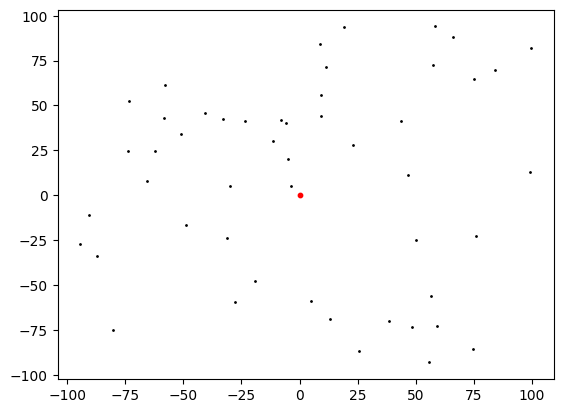

In [ ]:
distance, coordinate = gen_distance_arr(point, display=True)
demand = gen_demand_arr(point)

<font face="Google Sans"> Laslty, compute efficient but non optimal solutions using  **$\text{do_savings_algo}$** function

Route (1): [43, 31, 20, 25, 1, 47, 8, 34, 13, 33, 9, 37, 27, 14, 6, 49, 22, 4, 24]
Carrying: 942

Route (2): [44, 10, 26, 17, 23, 11, 7, 5, 2, 35, 42, 19, 40, 12, 39, 48, 50, 30]
Carrying: 990

Route (3): [21, 18, 29, 15, 3, 32, 38, 28, 16, 45, 41, 36, 46]
Carrying: 636



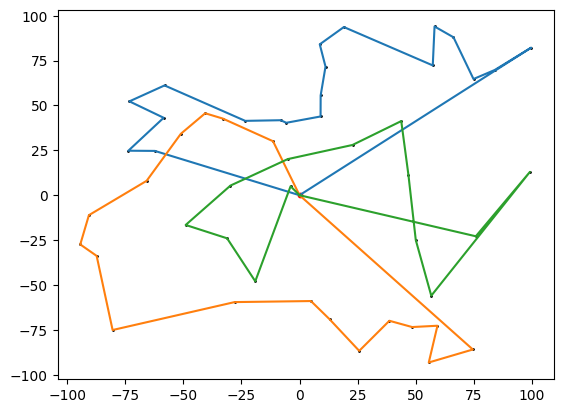

In [ ]:
plan = do_savings_algo(distance, demand, capacity, coordinate, display = True, dictate=True)

# **Demo** ( from given data )

<font face="Google Sans">**Files to help:**
*   Download the template: [Template](https://docs.google.com/spreadsheets/d/1TShRX33VBdqF3Yv7nAH9VI8hfXEtI-dP/edit?usp=sharing&ouid=111386642501900575313&rtpof=true&sd=true)

*   Download an example: [Example](https://docs.google.com/spreadsheets/d/1QripAAP6Fn1dkPoZzHRgXHVF4zSy_x_0/edit?usp=sharing&ouid=111386642501900575313&rtpof=true&sd=true)

\\

---

\\

**Below is an excel view for the inputted example_file.xlsx**</font>

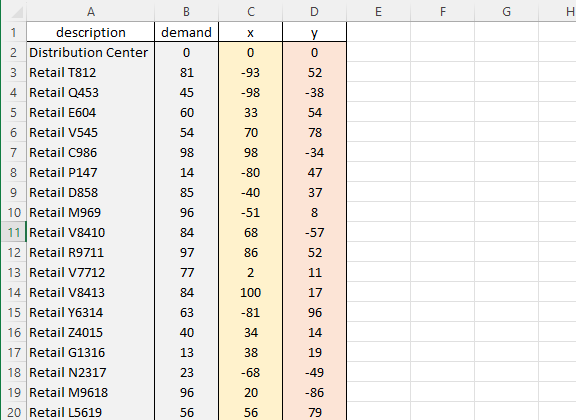


<font face="Google Sans"> First, determine the parameter ($\text{capacity}$ = amount of capacity able to be carried)

In [ ]:
capacity = 1000

<font face="Google Sans"> Second, download, fill, then input the edited $\text{template}$ or input the $\text{example}$ with format as provisioned  

Saving saving algo datset.xlsx to saving algo datset (1).xlsx


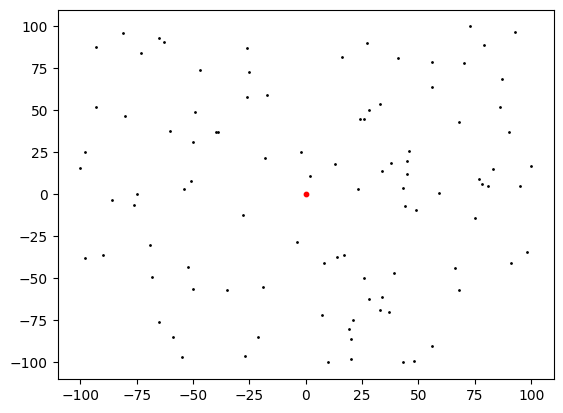

In [ ]:
coordinate, distance, demand, description = prc_data_xlsx(display=True)

<font face="Google Sans"> Laslty, compute efficient but non optimal solutions using  $\text{do_savings_algo}$ function, then return a number route in the form of array of index that represent the point $\text{(Distribution Center = 0, 1st Retail = 1, 2nd Retail = 2, etc)}$

Route (1): [81, 13, 34, 30, 23, 1, 6, 52, 95, 84, 2, 78, 16, 61, 68, 75, 88, 38]
Carrying: 994

Route (2): [32, 37, 41, 4, 39, 10, 54, 12, 90, 66, 22, 46, 58, 5, 93]
Carrying: 927

Route (3): [85, 27, 65, 72, 48, 17, 77, 74, 64, 60, 43, 62, 67, 45, 25, 9, 96, 28]
Carrying: 972

Route (4): [89, 18, 20, 82, 24, 92, 29, 97, 19, 42, 26, 59, 7, 73, 86, 87]
Carrying: 965

Route (5): [57, 49, 53, 83, 63, 70, 79, 56, 69, 98, 99, 50, 44, 51, 91, 3, 55]
Carrying: 978

Route (6): [35, 21, 15, 14, 36, 33, 76, 94, 71, 31, 8, 40, 47, 80, 11]
Carrying: 948



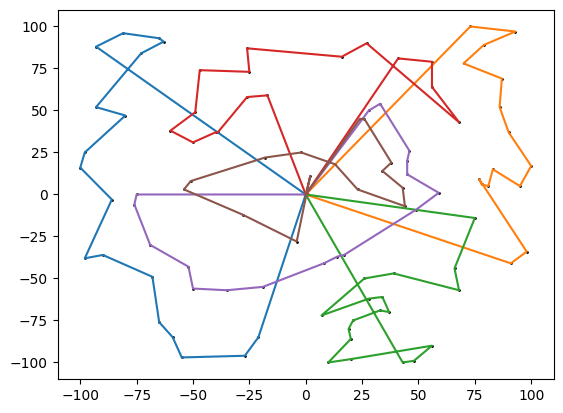

In [ ]:
plan = do_savings_algo(distance, demand, capacity, coordinate, display = True, dictate=True)